In [1]:
import pandas, seaborn, numpy

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20})

import pyensembl
annotation = pyensembl.EnsemblRelease(100)

# 1. read data

In [2]:
data_file = '/home/adrian/projects/vigur/results/transcriptomics/deseq2_filtered/strict_union_experiment_three.tsv'
df = pandas.read_csv(data_file, sep='\t')
df.set_index('gene_name', drop=True, inplace=True)
df.drop(columns=['zero4', 'zero24'], inplace=True)
df.drop(columns=['half4', 'five4', 'fifty4'], inplace=True)
df = df[df.abs().max(axis=1) >= 0.5]

print(df.shape)
df.head()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


(15, 3)


,half24,five24,fifty24
gene_name,,,
ENSG00000171246,2.321928,2.169925,2.700440
ENSG00000104267,1.807355,2.000000,2.169925
ENSG00000277492,-4.000000,-4.000000,-4.000000
ENSG00000281382,3.000000,2.321928,0.000000
ENSG00000023171,0.000000,1.584963,1.807355


# 2. plot data

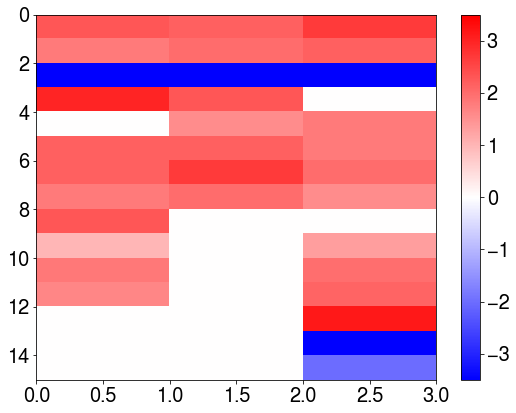

In [3]:
fig = matplotlib.pyplot.figure(figsize=1.4*numpy.array([6.4, 4.8]))
ax = fig.add_subplot(1,1,1)
o = ax.pcolor(df, cmap='bwr', vmin=-3.5, vmax=3.5)

fig.gca().invert_yaxis()

fig.colorbar(o, ax=ax)

# 3. cluster data using seaborn

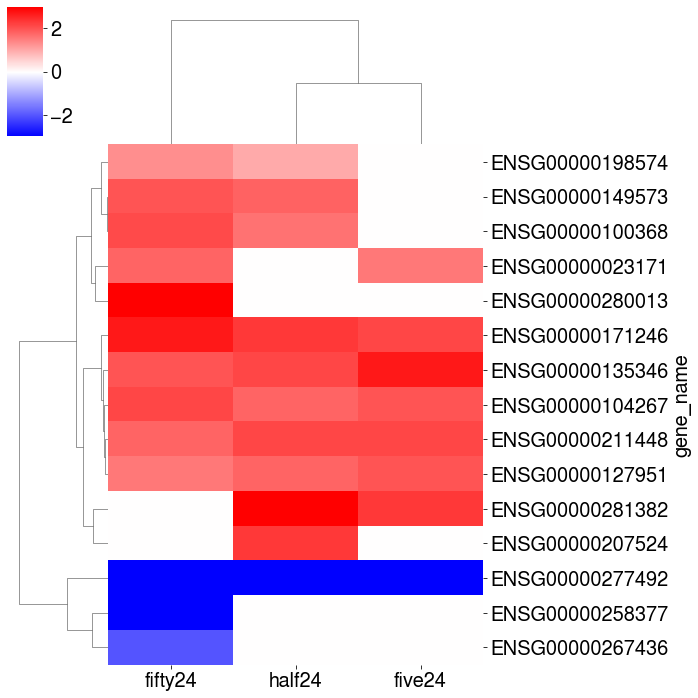

In [4]:
seaborn.clustermap(df, cmap='bwr', vmin=-3, vmax=3, method='ward')

# 4. qualitative clustering

In [5]:
up = df[df.sum(axis=1) > 0]
print(up.shape)
for ensembl in up.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    print(name)

(12, 3)
NPTX1
CA2
ENSG00000281382
GRAMD1B
DIO2
CGA
FGL2
RNU6-33P
SH2D1B
MPZL2
CSF2RB
CU639417.3


In [6]:
up = df[df.sum(axis=1) < 0]
print(up.shape)
for ensembl in up.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    print(name)

(3, 3)
AL627390.2
AL139099.2
AC005786.3


## 4.1. group selection

In [7]:
pos1 = df.loc[(df['half24'] > 0) & (df['five24'] > 0) & (df['fifty24'] > 0)]
pos1['sum'] = pos1.sum(axis=1)
pos1.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in pos1.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
pos1['names'] = gene_names

print(pos1.shape)
print(list(pos1['names']))
for name in gene_names:
    print(name)
text = ', '.join(gene_names)
print(text)
pos1.head(50)

(5, 5)
['NPTX1', 'CGA', 'DIO2', 'CA2', 'FGL2']
NPTX1
CGA
DIO2
CA2
FGL2
NPTX1, CGA, DIO2, CA2, FGL2


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,half24,five24,fifty24,sum,names
gene_name,,,,,
ENSG00000171246,2.321928,2.169925,2.700440,7.192293,NPTX1
ENSG00000135346,2.169925,2.700440,2.000000,6.870365,CGA
ENSG00000211448,2.169925,2.169925,1.807355,6.147205,DIO2
ENSG00000104267,1.807355,2.000000,2.169925,5.977280,CA2
ENSG00000127951,1.807355,2.000000,1.584963,5.392317,FGL2


In [8]:
pos2 = df.loc[(df['half24'] > 0) & (df['five24'] > 0) & (df['fifty24'] <= 0)]
pos2['sum'] = pos2.sum(axis=1)
pos2.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in pos2.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
pos2['names'] = gene_names

print(pos2.shape)
for name in gene_names:
    print(name)
text = ', '.join(gene_names)
print(text)
pos2.head()

(1, 5)
ENSG00000281382
ENSG00000281382


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,half24,five24,fifty24,sum,names
gene_name,,,,,
ENSG00000281382,3.0,2.321928,0.0,5.321928,ENSG00000281382


In [9]:
pos3 = df.loc[(df['half24'] <= 0) & (df['five24'] > 0) & (df['fifty24'] > 0)]
pos3['sum'] = pos3.sum(axis=1)
pos3.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in pos3.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
pos3['names'] = gene_names

print(pos3.shape)
for name in gene_names:
    print(name)
text = ', '.join(gene_names)
print(text)
pos3.head()

(1, 5)
GRAMD1B
GRAMD1B


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,half24,five24,fifty24,sum,names
gene_name,,,,,
ENSG00000023171,0.0,1.584963,1.807355,3.392317,GRAMD1B


In [10]:
pos4 = df.loc[(df['half24'] > 0) & (df['five24'] <= 0) & (df['fifty24'] > 0)]
pos4['sum'] = pos4.sum(axis=1)
pos4.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in pos4.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
pos4['names'] = gene_names

print(pos4.shape)
for name in gene_names:
    print(name)
pos4.head(10)

(3, 5)
MPZL2
CSF2RB
SH2D1B


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,half24,five24,fifty24,sum,names
gene_name,,,,,
ENSG00000149573,1.841302,0.0,1.995700,3.837002,MPZL2
ENSG00000100368,1.662965,0.0,2.115477,3.778442,CSF2RB
ENSG00000198574,1.000000,0.0,1.321928,2.321928,SH2D1B


In [11]:
pos5 = df.loc[(df['half24'] > 0) & (df['five24'] <= 0) & (df['fifty24'] <= 0)]
pos5['sum'] = pos5.sum(axis=1)
pos5.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in pos5.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
pos5['names'] = gene_names

print(pos5.shape)
print(list(pos5.index))
for name in gene_names:
    print(name)
print(pos5.shape)
pos5.head(20)

(1, 5)
['ENSG00000207524']
RNU6-33P
(1, 5)


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,half24,five24,fifty24,sum,names
gene_name,,,,,
ENSG00000207524,2.321928,0.0,0.0,2.321928,RNU6-33P


In [12]:
pos6 = df.loc[(df['half24'] <= 0) & (df['five24'] > 0) & (df['fifty24'] <= 0)]
pos6['sum'] = pos6.sum(axis=1)
pos6.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in pos6.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
pos6['names'] = gene_names

print(list(pos6.index))
text = ', '.join(gene_names)
for name in gene_names:
    print(name)
print(pos6.shape)
pos6.head(25)

[]
(0, 5)


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,half24,five24,fifty24,sum,names
gene_name,,,,,


In [13]:
pos7 = df.loc[(df['half24'] <= 0) & (df['five24'] <= 0) & (df['fifty24'] > 0)]
pos7['sum'] = pos7.sum(axis=1)
pos7.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in pos7.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
pos7['names'] = gene_names

print(pos7.shape)
text = ', '.join(gene_names)
print(text)
for name in gene_names:
    print(name)
pos7.head(20)

(1, 5)
CU639417.3
CU639417.3


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,half24,five24,fifty24,sum,names
gene_name,,,,,
ENSG00000280013,0.0,0.0,3.169925,3.169925,CU639417.3


In [14]:
neg1 = df.loc[(df['half24'] >= 0) & (df['five24'] >= 0) & (df['fifty24'] < 0)]
neg1['sum'] = neg1.sum(axis=1)
neg1.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in neg1.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
neg1['names'] = gene_names

print(neg1.shape)
text = ', '.join(gene_names)
print(text)
for name in gene_names:
    print(name)
neg1.head(20)

(2, 5)
AC005786.3, AL139099.2
AC005786.3
AL139099.2


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,half24,five24,fifty24,sum,names
gene_name,,,,,
ENSG00000267436,0.0,0.0,-2.000000,-2.000000,AC005786.3
ENSG00000258377,0.0,0.0,-4.584963,-4.584963,AL139099.2


In [15]:
neg2 = df.loc[(df['half24'] >= 0) & (df['five24'] < 0) & (df['fifty24'] >= 0)]
neg2['sum'] = neg2.sum(axis=1)
neg2.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in neg2.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
neg2['names'] = gene_names

print(neg2.shape)
text = ', '.join(gene_names)
print(text)
for name in gene_names:
    print(name)
neg2.head(15)

(0, 5)



/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,half24,five24,fifty24,sum,names
gene_name,,,,,


In [16]:
neg3 = df.loc[(df['half24'] < 0) & (df['five24'] >= 0) & (df['fifty24'] >= 0)]
neg3['sum'] = neg3.sum(axis=1)
neg3.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in neg3.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
neg3['names'] = gene_names

print(neg3.shape)
text = ', '.join(gene_names)
print(text)
for name in gene_names:
    print(name)
neg3.head(10)

(0, 5)



/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,half24,five24,fifty24,sum,names
gene_name,,,,,


In [17]:
neg4 = df.loc[(df['half24'] < 0) & (df['five24'] >= 0) & (df['fifty24'] < 0)]
neg4['sum'] = neg4.sum(axis=1)
neg4.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in neg4.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
neg4['names'] = gene_names

print(neg4.shape)
text = ', '.join(gene_names)
print(text)
for name in gene_names:
    print(name)
neg4.head()

(0, 5)



/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,half24,five24,fifty24,sum,names
gene_name,,,,,


In [18]:
neg5 = df.loc[(df['half24'] >= 0) & (df['five24'] < 0) & (df['fifty24'] < 0)]
neg5['sum'] = neg5.sum(axis=1)
neg5.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in neg5.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
neg5['names'] = gene_names

print(neg5.shape)
text = ', '.join(gene_names)
print(text)
neg5.head(10)

(0, 5)



/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,half24,five24,fifty24,sum,names
gene_name,,,,,


In [19]:
neg6 = df.loc[(df['half24'] < 0) & (df['five24'] < 0) & (df['fifty24'] >= 0)]
neg6['sum'] = neg6.sum(axis=1)
neg6.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in neg6.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
neg6['names'] = gene_names

print(neg6.shape)
print(', '.join(gene_names))
neg6.head(10)

(0, 5)



/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,half24,five24,fifty24,sum,names
gene_name,,,,,


In [20]:
neg7 = df.loc[(df['half24'] < 0) & (df['five24'] < 0) & (df['fifty24'] < 0)]
neg7['sum'] = neg7.sum(axis=1)
neg7.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in neg7.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
neg7['names'] = gene_names

print(neg7.shape)
for name in gene_names:
    print(name)
neg7.head(10)

(1, 5)
AL627390.2


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,half24,five24,fifty24,sum,names
gene_name,,,,,
ENSG00000277492,-4.0,-4.0,-4.0,-12.0,AL627390.2


## 4.2. re-order and plot

In [21]:
order_pos = list(pos1.index) + list(pos2.index) + list(pos3.index) + list(pos4.index) + list(pos5.index) + list(pos6.index) + list(pos7.index)
order_neg = list(neg1.index) + list(neg2.index) + list(neg3.index) + list(neg4.index) + list(neg5.index) + list(neg6.index) + list(neg7.index)
order = order_pos + order_neg

ordered = df.loc[order, :]

print(df.min(), df.max())

half24    -4.000000
five24    -4.000000
fifty24   -4.584963
dtype: float64 half24     3.000000
five24     2.700440
fifty24    3.169925
dtype: float64


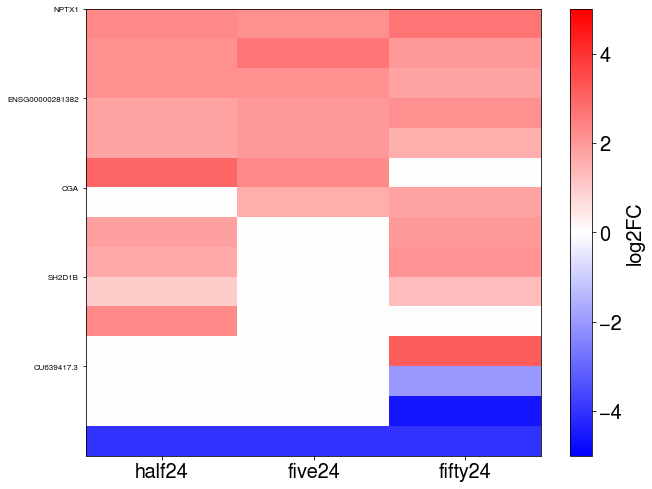

In [22]:
fig = matplotlib.pyplot.figure(figsize=1.5*numpy.array([6.4, 4.8]))
ax = fig.add_subplot(1,1,1)

heatmap = ax.pcolor(ordered, cmap='bwr', vmin=-5, vmax=5)

# invert y-axis
fig.gca().invert_yaxis()

# scale bar
cbar = fig.colorbar(heatmap, ax=ax)
cbar.set_label('log2FC', rotation=90)

# shift the x major ticks at the middle of each cell
ax.set_xticks(numpy.arange(ordered.shape[1]) + 0.5)

# define x labels
ax.set_xticklabels(df.columns)

# define y labels
gene_names = []
for ensembl in list(df.index):
    try:
        gene_name = annotation.gene_name_of_gene_id(ensembl)
    except:
        gene_name = ensembl
    gene_names.append(gene_name)
    
selected_positions = numpy.arange(0,len(gene_names), 3)
selected_labels = [gene_names[i] for i in selected_positions]

ax.set_yticks(selected_positions)
ax.set_yticklabels(selected_labels, fontsize=8)

# tight layout
fig.tight_layout()

# save
fig.savefig('heatmap_down.svg')